In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
%matplotlib inline 

In [70]:
dataset = pd.read_csv('/kaggle/input/loan-approval-dataset-final/loan_approval_dataset - loan_approval_dataset.csv.csv')

In [71]:
dataset

,loan_id,no_of_dependents,education,srit_score,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,Yes,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,No,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,Yes,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,Yes,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,No,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,No,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,No,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,Yes,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,Yes,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [72]:
dataset.drop(['loan_id'], axis = 1, inplace = True)

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   srit_score                4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['srit_score'] = le.fit_transform(dataset['srit_score'])
dataset['loan_status'] = le.fit_transform(dataset['loan_status'])
dataset['education'] = le.fit_transform(dataset['education'])

In [75]:
dataset

,no_of_dependents,education,srit_score,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,0,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [77]:
dataset.drop(['education'],axis=1,inplace=True)

In [79]:
from sklearn.model_selection import train_test_split
X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

In [81]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\neigenvalues \n%s' % eigen_vals)


eigenvalues 
[4.49036 0.04325 0.13771 0.2435  0.50569 0.57893 0.96417 1.02919 1.02161
 0.98851]


In [83]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
    for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((np.abs(eigen_pairs[0][1][:, np.newaxis]),
               np.abs(eigen_pairs[1][1][:, np.newaxis]),
               np.abs(eigen_pairs[2][1][:, np.newaxis])))
np.set_printoptions(precision=5, suppress=True)
print('Matrix W:\n', w)

Matrix W:
 [[0.0019  0.47825 0.53399]
 [0.00415 0.49599 0.50447]
 [0.45915 0.00609 0.00065]
 [0.44009 0.00394 0.00177]
 [0.00416 0.45997 0.51934]
 [0.00984 0.5586  0.43333]
 [0.33966 0.00027 0.01898]
 [0.33937 0.0374  0.0488 ]
 [0.43931 0.01443 0.01042]
 [0.41453 0.00283 0.00359]]


In [84]:
X_train_pca = X_train_std.dot(w)

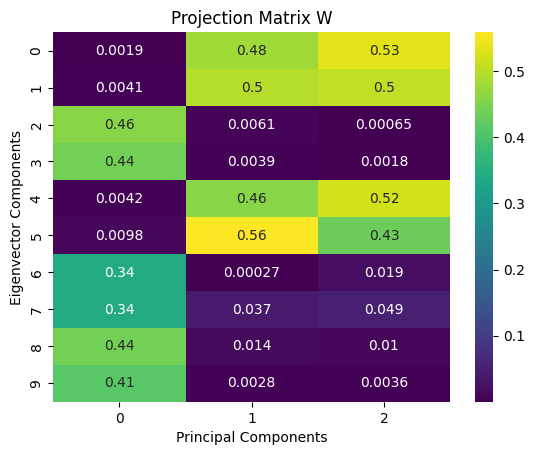

In [85]:
sns.heatmap(w, cmap='viridis', annot=True)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvector Components')
plt.title('Projection Matrix W')
plt.show()

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import randint, uniform
import numpy as np
models_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': np.logspace(-3, 3, 7),
            'penalty': ['l1', 'l2']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': randint(1, 20),
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'bootstrap': [True, False]
        }
    }
}

best_models = {}
for model_name, mp in models_params.items():
    random_search = RandomizedSearchCV(mp['model'], mp['params'], cv=5, n_iter=10, n_jobs=-1, random_state=1)
    random_search.fit(X_train_pca, y_train)
    best_models[model_name] = random_search.best_estimator_
for model_name, best_model in best_models.items():
    print(f'{model_name}: {best_model}')

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

LogisticRegression: LogisticRegression()
DecisionTreeClassifier: DecisionTreeClassifier(criterion='entropy', max_depth=12)
RandomForestClassifier: RandomForestClassifier(max_depth=14, n_estimators=147)


In [87]:
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
classifier = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs', class_weight='balanced')
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
import pickle
with open('pca_object.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[357 174]
 [106 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       531
           1       0.55      0.67      0.61       323

    accuracy                           0.67       854
   macro avg       0.66      0.67      0.66       854
weighted avg       0.69      0.67      0.68       854



In [89]:
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=6, class_weight='balanced')
classifier2.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, random_state=1)

In [90]:
y_pred = classifier2.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[301 230]
 [ 40 283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.57      0.69       531
           1       0.55      0.88      0.68       323

    accuracy                           0.68       854
   macro avg       0.72      0.72      0.68       854
weighted avg       0.76      0.68      0.69       854



In [92]:
classifier3 = RandomForestClassifier(n_estimators = 143, criterion = 'entropy', random_state = 1, max_depth=10, class_weight='balanced')
classifier3.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=143, random_state=1)

In [93]:
y_pred = classifier3.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[373 158]
 [ 92 231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       531
           1       0.59      0.72      0.65       323

    accuracy                           0.71       854
   macro avg       0.70      0.71      0.70       854
weighted avg       0.72      0.71      0.71       854



In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
clf1 = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=6, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators = 143, criterion = 'entropy', random_state = 1, max_depth=10, class_weight='balanced')
clf_labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']
print('10-fold cross-validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train_pca, y=y_train, cv=50, scoring='roc_auc') 
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross-validation:

ROC AUC: 0.81 (+/- 0.05) [Logistic Regression]
ROC AUC: 0.83 (+/- 0.05) [Decision Tree]
ROC AUC: 0.85 (+/- 0.04) [Random Forest]


In [97]:
from sklearn.svm import SVC
classifier4 = SVC(kernel='linear', class_weight='balanced', random_state=1)
classifier4.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

In [98]:
y_pred = classifier4.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[366 165]
 [113 210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       531
           1       0.56      0.65      0.60       323

    accuracy                           0.67       854
   macro avg       0.66      0.67      0.66       854
weighted avg       0.69      0.67      0.68       854



In [99]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'kernel': ['linear']},
              {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=SVC(class_weight='balanced', kernel='linear', random_state=1),
                  param_grid=param_grid,
                  scoring='precision',
                  cv=2,
                 n_jobs=-1)
gs.fit(X_train_pca, y_train)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X_train_pca, y_train, scoring='precision', cv=5, n_jobs=-1)
print(f'Precision: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Precision: 0.667 +/- 0.279


In [100]:
from sklearn.svm import SVC
classifier5 = SVC(kernel='rbf', gamma=1000.0, class_weight='balanced', random_state=1)
classifier5.fit(X_train_pca, y_train)
y_pred = classifier5.predict(X_test_pca)

In [101]:
y_pred = classifier5.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[529   2]
 [321   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       531
           1       0.50      0.01      0.01       323

    accuracy                           0.62       854
   macro avg       0.56      0.50      0.39       854
weighted avg       0.58      0.62      0.48       854



In [102]:
from sklearn.ensemble import VotingClassifier
clf4 = SVC(kernel='rbf', gamma=1000.0, class_weight='balanced', random_state=1, probability=True)
mv_clf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3), ('clf4', clf4)], voting='soft')
clf_labels2 = ['Logistic Regression', 'Decision Tree', 'Random Forest','SCV']
clf_labels2 += ['Majority Voting']
all_clf = [clf1, clf2, clf3, clf4, mv_clf]
for clf, label in zip(all_clf, clf_labels2):
    scores = cross_val_score(estimator=clf,
                             X=X_train_pca,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

ROC AUC: 0.82 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.83 (+/- 0.03) [Decision Tree]
ROC AUC: 0.84 (+/- 0.02) [Random Forest]
ROC AUC: 0.65 (+/- 0.02) [SCV]
ROC AUC: 0.83 (+/- 0.02) [Majority Voting]


In [105]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train_pca, label=y_train)
D_test = xgb.DMatrix(X_test_pca, label=y_test)

In [ ]:
clf5 = xgb.XGBClassifier()
parameters = {
     "eta": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight": [ 1, 3, 5, 7 ],
     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ]
     }

gs2 = GridSearchCV(clf5,
                    parameters, n_jobs=-1,
                    scoring="neg_log_loss",
                    cv=3)

gs2.fit(X_train_pca, y_train)
best_params = gs2.best_params_
print(best_params)

In [107]:
classifier6 = xgb.XGBClassifier(colsample_bytree=0.7, eta=0.1, gamma=0.3, max_depth=4, min_child_weight=1)
classifier6.fit(X_train_pca, y_train)
y_pred = classifier6.predict(X_test_pca)
import pickle
pickle.dump(classifier6, open('model.pkl','wb'))

In [108]:
y_pred = classifier6.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[479  52]
 [163 160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       531
           1       0.75      0.50      0.60       323

    accuracy                           0.75       854
   macro avg       0.75      0.70      0.71       854
weighted avg       0.75      0.75      0.73       854

